# Tutorial 4: Composite and Distance-Modulated Initialization Strategies

[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/chaobrain/braintools/blob/main/docs/init_tutorial_04_composite_distance_modulated.ipynb)

This tutorial explores advanced initialization strategies that combine multiple distributions and modulate weights based on spatial distance. These techniques enable the creation of biologically realistic and heterogeneous neural networks.

## Topics Covered

1. **Composite initialization** patterns
2. **Mixture distributions** for heterogeneous populations
3. **Conditional initialization** based on neuron properties
4. **Scaled and Clipped** distributions
5. **DistanceModulated**: combining base distributions with distance profiles
6. **Building complex** initialization schemes
7. **Integration example**: biologically realistic connectivity patterns

## Installation and Setup

In [ ]:
# Install braintools if needed
# !pip install braintools brainunit matplotlib numpy scipy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import brainunit as u
from braintools import init

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['font.size'] = 10

## 1. Introduction to Composite Initialization

### Why Composite Initialization?

Real neural networks exhibit:
- **Heterogeneity**: Not all neurons/connections are identical
- **Population diversity**: Excitatory vs inhibitory, different subtypes
- **Spatial structure**: Distance-dependent properties
- **Complex patterns**: Multiple mechanisms combine

### Types of Composition

1. **Mixture**: Random selection from multiple distributions
2. **Conditional**: Different distributions based on properties
3. **Scaled/Clipped**: Transform a base distribution
4. **Distance-modulated**: Spatial modulation of weights

### Key Principles

- **Modularity**: Build complex from simple components
- **Biological realism**: Match observed data
- **Composability**: Combine multiple strategies

## 2. Mixture Distributions

**Mixture distributions** randomly select from multiple distributions according to specified weights. This creates heterogeneous populations.

### Mathematical Definition

For distributions $D_1, D_2, \ldots, D_k$ with weights $w_1, w_2, \ldots, w_k$ (where $\sum w_i = 1$):

$$W \sim \sum_{i=1}^k w_i D_i$$

### Use Cases

- Multiple synapse types
- Heterogeneous connection strengths
- Multimodal weight distributions
- Subpopulation diversity

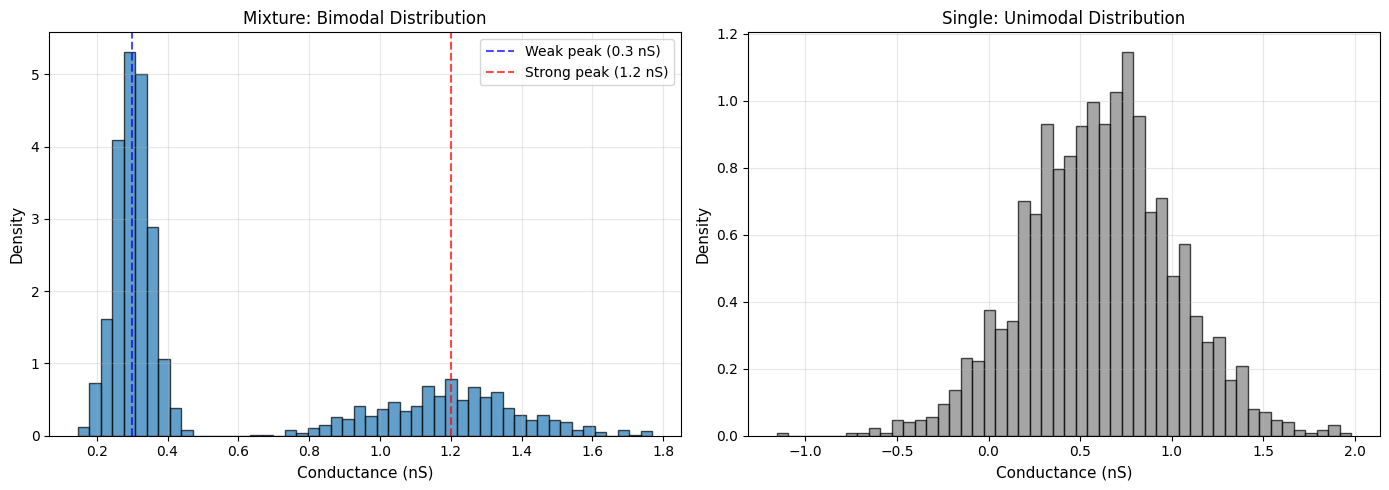

Mixture Distribution:
  Mean: 0.579 * nsiemens
  Std: 0.431 * nsiemens
  Range: [0.15 * nsiemens, 1.77 * nsiemens]

Single Distribution:
  Mean: 0.604 * nsiemens
  Std: 0.403 * nsiemens
  Range: [-1.16 * nsiemens, 1.98 * nsiemens]


In [2]:
# Example 1: Two-component mixture (weak and strong synapses)
mixture_simple = init.Mixture(
    distributions=[
        init.Normal(mean=0.3 * u.nS, std=0.05 * u.nS),  # Weak synapses
        init.Normal(mean=1.2 * u.nS, std=0.2 * u.nS),   # Strong synapses
    ],
    weights=[0.7, 0.3]  # 70% weak, 30% strong
)

# Generate samples
rng = np.random.default_rng(42)
weights_mixture = mixture_simple(2000, rng=rng)

# For comparison: single normal distribution
weights_single = init.Normal(0.6 * u.nS, 0.4 * u.nS)(2000, rng=rng)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Mixture distribution
axes[0].hist(weights_mixture.mantissa, bins=50, alpha=0.7, edgecolor='black', density=True)
axes[0].axvline(0.3, color='blue', linestyle='--', alpha=0.7, label='Weak peak (0.3 nS)')
axes[0].axvline(1.2, color='red', linestyle='--', alpha=0.7, label='Strong peak (1.2 nS)')
axes[0].set_xlabel(f'Conductance ({weights_mixture.unit})', fontsize=11)
axes[0].set_ylabel('Density', fontsize=11)
axes[0].set_title('Mixture: Bimodal Distribution', fontsize=12)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Single distribution for comparison
axes[1].hist(weights_single.mantissa, bins=50, alpha=0.7, edgecolor='black', 
             density=True, color='gray')
axes[1].set_xlabel(f'Conductance ({weights_single.unit})', fontsize=11)
axes[1].set_ylabel('Density', fontsize=11)
axes[1].set_title('Single: Unimodal Distribution', fontsize=12)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mixture Distribution:")
print(f"  Mean: {weights_mixture.mean():.3f}")
print(f"  Std: {weights_mixture.std():.3f}")
print(f"  Range: [{weights_mixture.min():.2f}, {weights_mixture.max():.2f}]")
print(f"\nSingle Distribution:")
print(f"  Mean: {weights_single.mean():.3f}")
print(f"  Std: {weights_single.std():.3f}")
print(f"  Range: [{weights_single.min():.2f}, {weights_single.max():.2f}]")

### Multi-Component Mixture

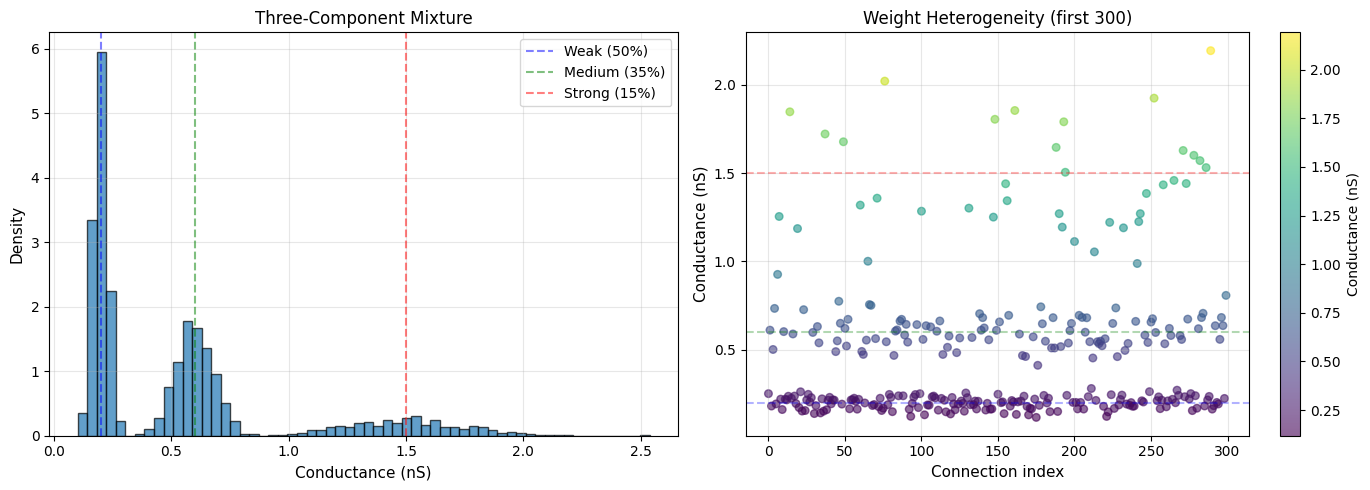


Synapse classification:
  Weak (< 0.4 nS): 1483 (49.4%)
  Medium (0.4-1.0 nS): 1075 (35.8%)
  Strong (> 1.0 nS): 442 (14.7%)


In [3]:
# Example 2: Three-component mixture (weak, medium, strong)
mixture_triple = init.Mixture(
    distributions=[
        init.Normal(mean=0.2 * u.nS, std=0.03 * u.nS),   # Weak
        init.Normal(mean=0.6 * u.nS, std=0.08 * u.nS),   # Medium
        init.Normal(mean=1.5 * u.nS, std=0.25 * u.nS),   # Strong
    ],
    weights=[0.5, 0.35, 0.15]  # 50% weak, 35% medium, 15% strong
)

weights_triple = mixture_triple(3000, rng=rng)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(weights_triple.mantissa, bins=60, alpha=0.7, edgecolor='black', density=True)
axes[0].axvline(0.2, color='blue', linestyle='--', alpha=0.5, label='Weak (50%)')
axes[0].axvline(0.6, color='green', linestyle='--', alpha=0.5, label='Medium (35%)')
axes[0].axvline(1.5, color='red', linestyle='--', alpha=0.5, label='Strong (15%)')
axes[0].set_xlabel(f'Conductance ({weights_triple.unit})', fontsize=11)
axes[0].set_ylabel('Density', fontsize=11)
axes[0].set_title('Three-Component Mixture', fontsize=12)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Scatter plot showing heterogeneity
indices = np.arange(len(weights_triple))[:300]  # Show first 300
colors = weights_triple.mantissa[:300]
scatter = axes[1].scatter(indices, weights_triple.mantissa[:300], 
                          c=colors, cmap='viridis', s=30, alpha=0.6)
axes[1].axhline(0.2, color='blue', linestyle='--', alpha=0.3)
axes[1].axhline(0.6, color='green', linestyle='--', alpha=0.3)
axes[1].axhline(1.5, color='red', linestyle='--', alpha=0.3)
axes[1].set_xlabel('Connection index', fontsize=11)
axes[1].set_ylabel(f'Conductance ({weights_triple.unit})', fontsize=11)
axes[1].set_title('Weight Heterogeneity (first 300)', fontsize=12)
plt.colorbar(scatter, ax=axes[1], label='Conductance (nS)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Classify synapses
weak_mask = weights_triple.mantissa < 0.4
strong_mask = weights_triple.mantissa > 1.0
medium_mask = ~weak_mask & ~strong_mask

print(f"\nSynapse classification:")
print(f"  Weak (< 0.4 nS): {np.sum(weak_mask)} ({100*np.sum(weak_mask)/len(weights_triple):.1f}%)")
print(f"  Medium (0.4-1.0 nS): {np.sum(medium_mask)} ({100*np.sum(medium_mask)/len(weights_triple):.1f}%)")
print(f"  Strong (> 1.0 nS): {np.sum(strong_mask)} ({100*np.sum(strong_mask)/len(weights_triple):.1f}%)")

### Mixture with Different Distribution Types

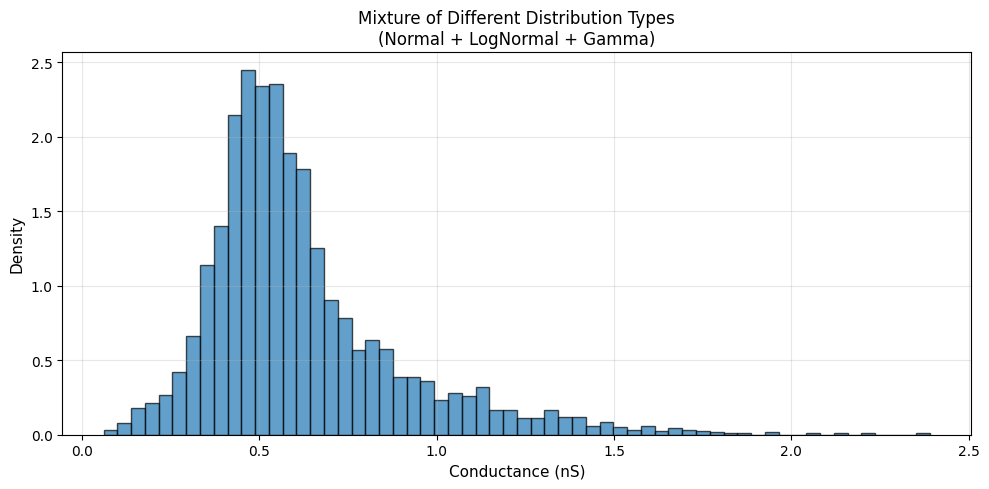


💡 Mixing distribution types creates rich heterogeneity!
  Skewness: 1.61
  This matches biological observations of synaptic variability


In [4]:
# Mix different distribution types
mixture_mixed = init.Mixture(
    distributions=[
        init.Normal(mean=0.5 * u.nS, std=0.1 * u.nS),     # Normal
        init.LogNormal(mean=0.8 * u.nS, std=0.3 * u.nS),  # LogNormal
        init.Gamma(shape=3.0, scale=0.2 * u.nS),          # Gamma
    ],
    weights=[0.5, 0.3, 0.2]
)

weights_mixed = mixture_mixed(3000, rng=rng)

# Visualize
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.hist(weights_mixed.mantissa, bins=60, alpha=0.7, edgecolor='black', density=True)
ax.set_xlabel(f'Conductance ({weights_mixed.unit})', fontsize=11)
ax.set_ylabel('Density', fontsize=11)
ax.set_title('Mixture of Different Distribution Types\n(Normal + LogNormal + Gamma)', fontsize=12)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n💡 Mixing distribution types creates rich heterogeneity!")
print(f"  Skewness: {((weights_mixed.mantissa - weights_mixed.mean().mantissa) ** 3).mean() / weights_mixed.std().mantissa ** 3:.2f}")
print(f"  This matches biological observations of synaptic variability")

## 3. Conditional Initialization

**Conditional initialization** uses different distributions based on neuron properties or indices.

### Use Cases

- Excitatory vs inhibitory neurons
- Layer-specific properties
- Cell type-specific parameters
- Spatial region-specific initialization

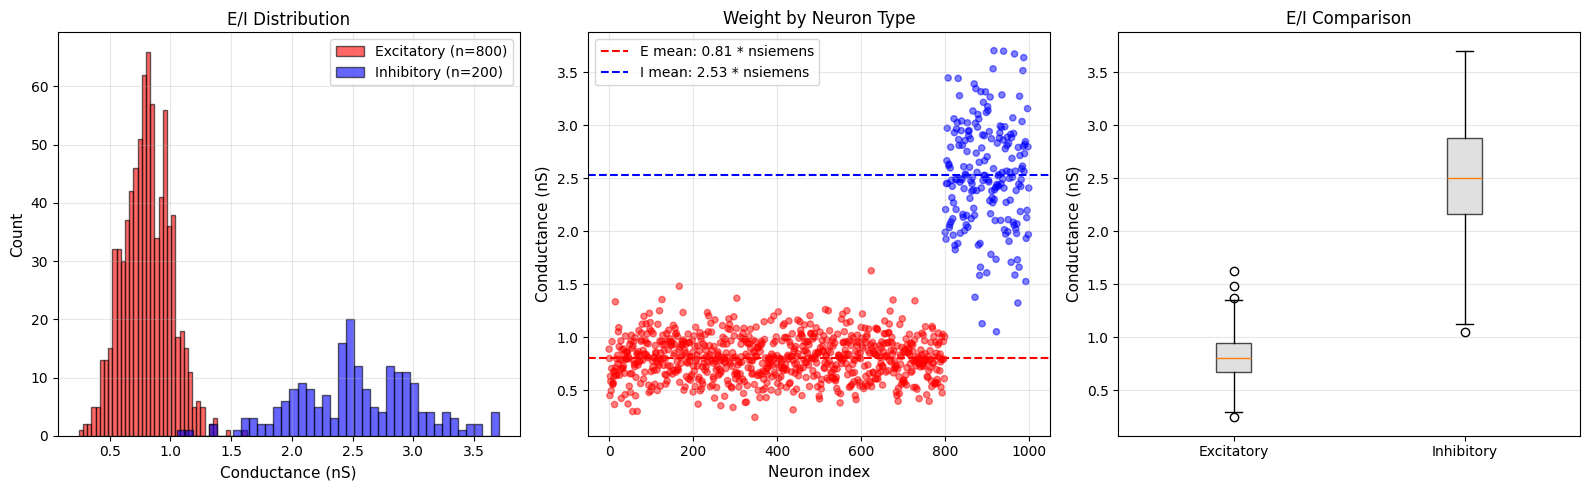


Excitatory neurons (n=800):
  Mean: 0.806 * nsiemens
  Std: 0.197 * nsiemens

Inhibitory neurons (n=200):
  Mean: 2.527 * nsiemens
  Std: 0.497 * nsiemens

💡 Inhibitory synapses are ~3.1× stronger (E/I balance)


In [7]:
# Example 1: Excitatory vs Inhibitory neurons
def is_excitatory(indices):
    """First 80% are excitatory, last 20% inhibitory."""
    return indices < 800

conditional_ei = init.Conditional(
    condition_fn=is_excitatory,
    true_dist=init.TruncatedNormal(
        mean=0.8 * u.nS,
        std=0.2 * u.nS,
        low=0.2 * u.nS,
        high=2.0 * u.nS
    ),  # Excitatory: positive, moderate strength
    false_dist=init.TruncatedNormal(
        mean=2.5 * u.nS,
        std=0.5 * u.nS,
        low=1.0 * u.nS,
        high=5.0 * u.nS
    )  # Inhibitory: stronger (to balance E)
)

# Generate weights
n_neurons = 1000
neuron_indices = np.arange(n_neurons)
weights_ei = conditional_ei(n_neurons, neuron_indices=neuron_indices, rng=rng)

# Separate E and I
exc_mask = is_excitatory(neuron_indices)
inh_mask = ~exc_mask

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Combined histogram
axes[0].hist(weights_ei[exc_mask].mantissa, bins=40, alpha=0.6, 
             edgecolor='black', label='Excitatory (n=800)', color='red')
axes[0].hist(weights_ei[inh_mask].mantissa, bins=40, alpha=0.6, 
             edgecolor='black', label='Inhibitory (n=200)', color='blue')
axes[0].set_xlabel(f'Conductance ({weights_ei.unit})', fontsize=11)
axes[0].set_ylabel('Count', fontsize=11)
axes[0].set_title('E/I Distribution', fontsize=12)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Scatter plot
colors = ['red' if e else 'blue' for e in exc_mask]
axes[1].scatter(neuron_indices, weights_ei.mantissa, c=colors, s=20, alpha=0.5)
axes[1].axhline(weights_ei[exc_mask].mean().mantissa, color='red', 
                linestyle='--', label=f'E mean: {weights_ei[exc_mask].mean():.2f}')
axes[1].axhline(weights_ei[inh_mask].mean().mantissa, color='blue', 
                linestyle='--', label=f'I mean: {weights_ei[inh_mask].mean():.2f}')
axes[1].set_xlabel('Neuron index', fontsize=11)
axes[1].set_ylabel(f'Conductance ({weights_ei.unit})', fontsize=11)
axes[1].set_title('Weight by Neuron Type', fontsize=12)
axes[1].legend()
axes[1].grid(alpha=0.3)

# Box plot comparison
axes[2].boxplot([weights_ei[exc_mask].mantissa, weights_ei[inh_mask].mantissa],
                tick_labels=['Excitatory', 'Inhibitory'],
                patch_artist=True,
                boxprops=dict(facecolor='lightgray', alpha=0.7))
axes[2].set_ylabel(f'Conductance ({weights_ei.unit})', fontsize=11)
axes[2].set_title('E/I Comparison', fontsize=12)
axes[2].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\nExcitatory neurons (n={np.sum(exc_mask)}):")
print(f"  Mean: {weights_ei[exc_mask].mean():.3f}")
print(f"  Std: {weights_ei[exc_mask].std():.3f}")
print(f"\nInhibitory neurons (n={np.sum(inh_mask)}):")
print(f"  Mean: {weights_ei[inh_mask].mean():.3f}")
print(f"  Std: {weights_ei[inh_mask].std():.3f}")
print(f"\n💡 Inhibitory synapses are ~{weights_ei[inh_mask].mean() / weights_ei[exc_mask].mean():.1f}× stronger (E/I balance)")

### Complex Conditional Logic

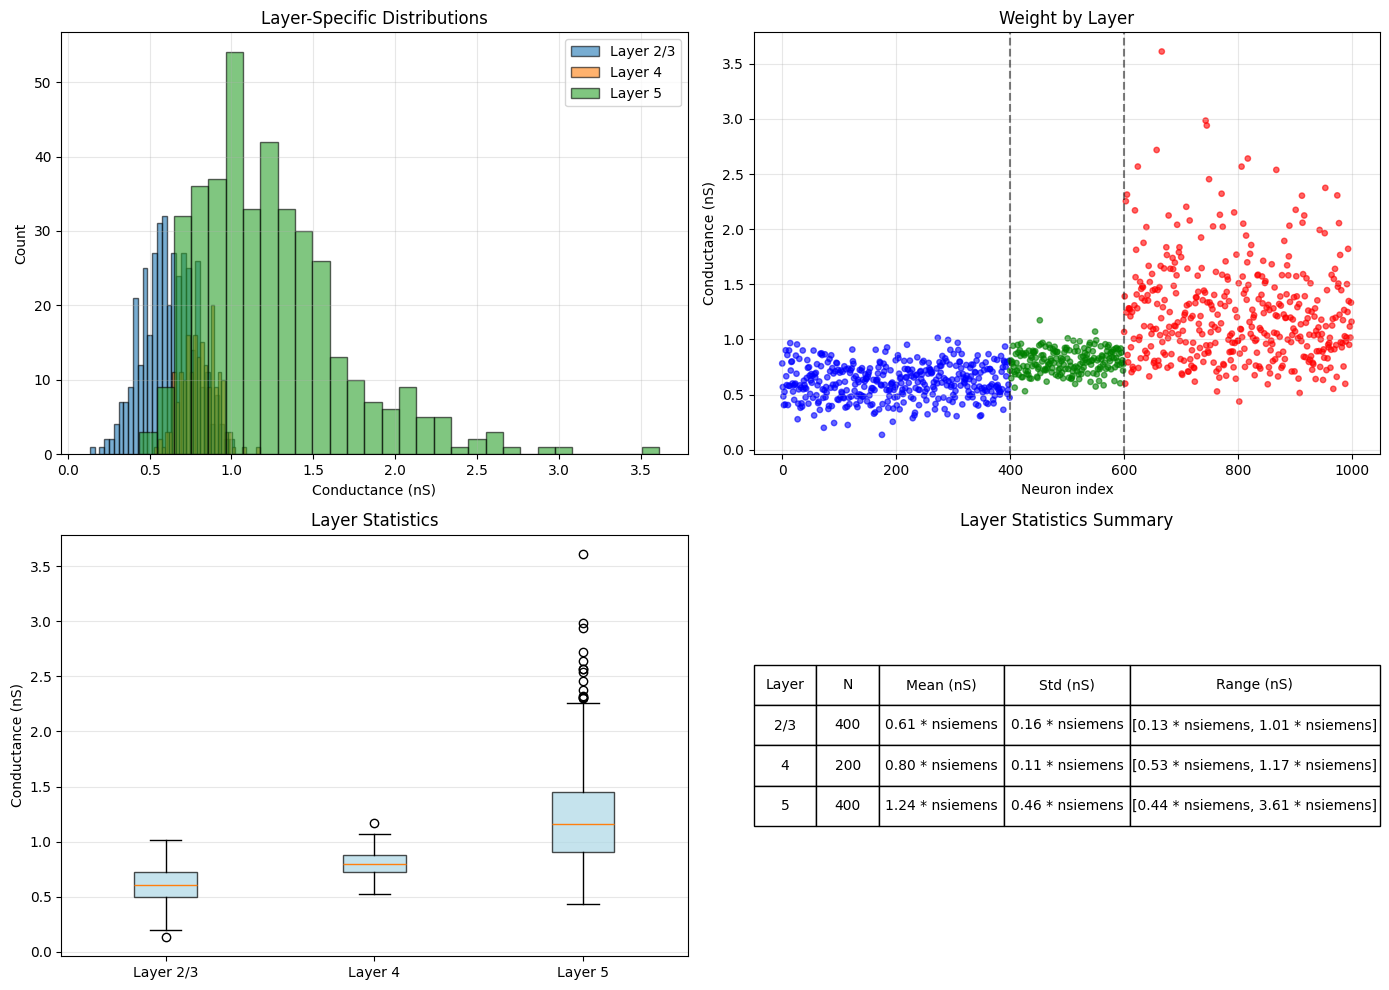


🧠 Layer-specific properties captured!


In [6]:
# Example 2: Layer-specific initialization
def get_layer(indices):
    """
    Classify neurons into layers based on index.
    Layer 2/3: 0-400
    Layer 4: 400-600
    Layer 5: 600-1000
    """
    if hasattr(indices, '__len__'):
        layers = np.zeros_like(indices)
        layers[indices < 400] = 0  # Layer 2/3
        layers[(indices >= 400) & (indices < 600)] = 1  # Layer 4
        layers[indices >= 600] = 2  # Layer 5
        return layers
    else:
        if indices < 400:
            return 0
        elif indices < 600:
            return 1
        else:
            return 2

# Create layer-specific distributions
n_neurons = 1000
neuron_indices = np.arange(n_neurons)
layers = get_layer(neuron_indices)

# Initialize each layer separately
weights_layers = np.zeros(n_neurons)

# Layer 2/3: moderate, variable
layer23_mask = layers == 0
weights_layers[layer23_mask] = init.Normal(0.6 * u.nS, 0.15 * u.nS)(
    np.sum(layer23_mask), rng=rng
).mantissa

# Layer 4: dense, uniform
layer4_mask = layers == 1
weights_layers[layer4_mask] = init.TruncatedNormal(
    0.8 * u.nS, 0.1 * u.nS, 0.5 * u.nS, 1.2 * u.nS
)(np.sum(layer4_mask), rng=rng).mantissa

# Layer 5: strong, long-range
layer5_mask = layers == 2
weights_layers[layer5_mask] = init.LogNormal(1.2 * u.nS, 0.4 * u.nS)(
    np.sum(layer5_mask), rng=rng
).mantissa

weights_layers = weights_layers * u.nS

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram by layer
axes[0, 0].hist(weights_layers[layer23_mask].mantissa, bins=30, alpha=0.6, 
                label='Layer 2/3', edgecolor='black')
axes[0, 0].hist(weights_layers[layer4_mask].mantissa, bins=30, alpha=0.6, 
                label='Layer 4', edgecolor='black')
axes[0, 0].hist(weights_layers[layer5_mask].mantissa, bins=30, alpha=0.6, 
                label='Layer 5', edgecolor='black')
axes[0, 0].set_xlabel(f'Conductance ({weights_layers.unit})')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Layer-Specific Distributions')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Scatter by neuron index
layer_colors = ['blue', 'green', 'red']
colors = [layer_colors[int(l)] for l in layers]
axes[0, 1].scatter(neuron_indices, weights_layers.mantissa, c=colors, s=15, alpha=0.6)
axes[0, 1].axvline(400, color='black', linestyle='--', alpha=0.5)
axes[0, 1].axvline(600, color='black', linestyle='--', alpha=0.5)
axes[0, 1].set_xlabel('Neuron index')
axes[0, 1].set_ylabel(f'Conductance ({weights_layers.unit})')
axes[0, 1].set_title('Weight by Layer')
axes[0, 1].grid(alpha=0.3)

# Box plot
axes[1, 0].boxplot(
    [weights_layers[layer23_mask].mantissa, 
     weights_layers[layer4_mask].mantissa,
     weights_layers[layer5_mask].mantissa],
    tick_labels=['Layer 2/3', 'Layer 4', 'Layer 5'],
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', alpha=0.7)
)
axes[1, 0].set_ylabel(f'Conductance ({weights_layers.unit})')
axes[1, 0].set_title('Layer Statistics')
axes[1, 0].grid(alpha=0.3, axis='y')

# Statistics table
axes[1, 1].axis('off')
stats_data = [
    ['Layer', 'N', 'Mean (nS)', 'Std (nS)', 'Range (nS)'],
    ['2/3', f'{np.sum(layer23_mask)}', 
     f'{weights_layers[layer23_mask].mean():.2f}',
     f'{weights_layers[layer23_mask].std():.2f}',
     f'[{weights_layers[layer23_mask].min():.2f}, {weights_layers[layer23_mask].max():.2f}]'],
    ['4', f'{np.sum(layer4_mask)}', 
     f'{weights_layers[layer4_mask].mean():.2f}',
     f'{weights_layers[layer4_mask].std():.2f}',
     f'[{weights_layers[layer4_mask].min():.2f}, {weights_layers[layer4_mask].max():.2f}]'],
    ['5', f'{np.sum(layer5_mask)}', 
     f'{weights_layers[layer5_mask].mean():.2f}',
     f'{weights_layers[layer5_mask].std():.2f}',
     f'[{weights_layers[layer5_mask].min():.2f}, {weights_layers[layer5_mask].max():.2f}]'],
]

table = axes[1, 1].table(cellText=stats_data, cellLoc='center', loc='center',
                         colWidths=[0.1, 0.1, 0.2, 0.2, 0.4])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
axes[1, 1].set_title('Layer Statistics Summary')

plt.tight_layout()
plt.show()

print("\n🧠 Layer-specific properties captured!")

## 4. Scaled and Clipped Distributions

### Scaled Distribution

**Scaled** multiplies a base distribution by a constant:

$$W_{scaled} = \alpha \cdot W_{base}$$

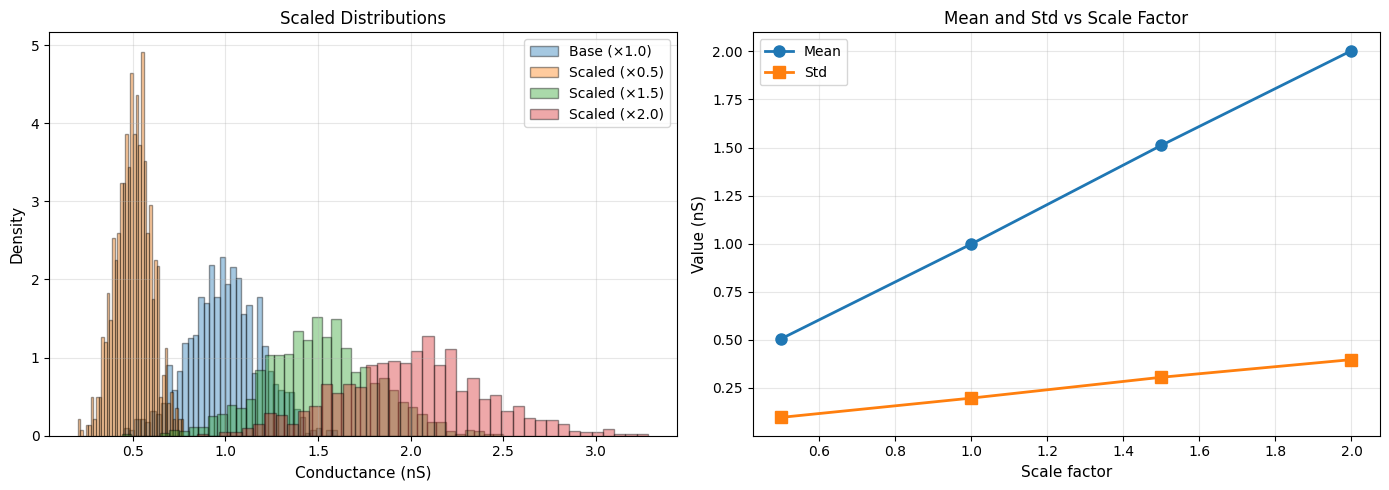


📏 Scaling properties:
  Mean scales linearly with factor
  Std also scales linearly
  Shape (CV) remains constant


In [8]:
# Scaled distribution
base_dist = init.Normal(mean=1.0 * u.nS, std=0.2 * u.nS)

scaled_05 = init.Scaled(base_dist, scale_factor=0.5)
scaled_15 = init.Scaled(base_dist, scale_factor=1.5)
scaled_2 = init.Scaled(base_dist, scale_factor=2.0)

# Generate weights
weights_base = base_dist(1000, rng=rng)
weights_05 = scaled_05(1000, rng=rng)
weights_15 = scaled_15(1000, rng=rng)
weights_2 = scaled_2(1000, rng=rng)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Overlaid histograms
axes[0].hist(weights_base.mantissa, bins=40, alpha=0.4, label='Base (×1.0)', 
             edgecolor='black', density=True)
axes[0].hist(weights_05.mantissa, bins=40, alpha=0.4, label='Scaled (×0.5)', 
             edgecolor='black', density=True)
axes[0].hist(weights_15.mantissa, bins=40, alpha=0.4, label='Scaled (×1.5)', 
             edgecolor='black', density=True)
axes[0].hist(weights_2.mantissa, bins=40, alpha=0.4, label='Scaled (×2.0)', 
             edgecolor='black', density=True)
axes[0].set_xlabel(f'Conductance ({weights_base.unit})', fontsize=11)
axes[0].set_ylabel('Density', fontsize=11)
axes[0].set_title('Scaled Distributions', fontsize=12)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Mean and std comparison
scale_factors = [0.5, 1.0, 1.5, 2.0]
means = [weights_05.mean().mantissa, weights_base.mean().mantissa, 
         weights_15.mean().mantissa, weights_2.mean().mantissa]
stds = [weights_05.std().mantissa, weights_base.std().mantissa, 
        weights_15.std().mantissa, weights_2.std().mantissa]

axes[1].plot(scale_factors, means, 'o-', linewidth=2, markersize=8, label='Mean')
axes[1].plot(scale_factors, stds, 's-', linewidth=2, markersize=8, label='Std')
axes[1].set_xlabel('Scale factor', fontsize=11)
axes[1].set_ylabel(f'Value ({weights_base.unit})', fontsize=11)
axes[1].set_title('Mean and Std vs Scale Factor', fontsize=12)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📏 Scaling properties:")
print(f"  Mean scales linearly with factor")
print(f"  Std also scales linearly")
print(f"  Shape (CV) remains constant")

### Clipped Distribution

**Clipped** bounds values to [min, max]:

$$W_{clipped} = \text{clip}(W_{base}, w_{min}, w_{max})$$

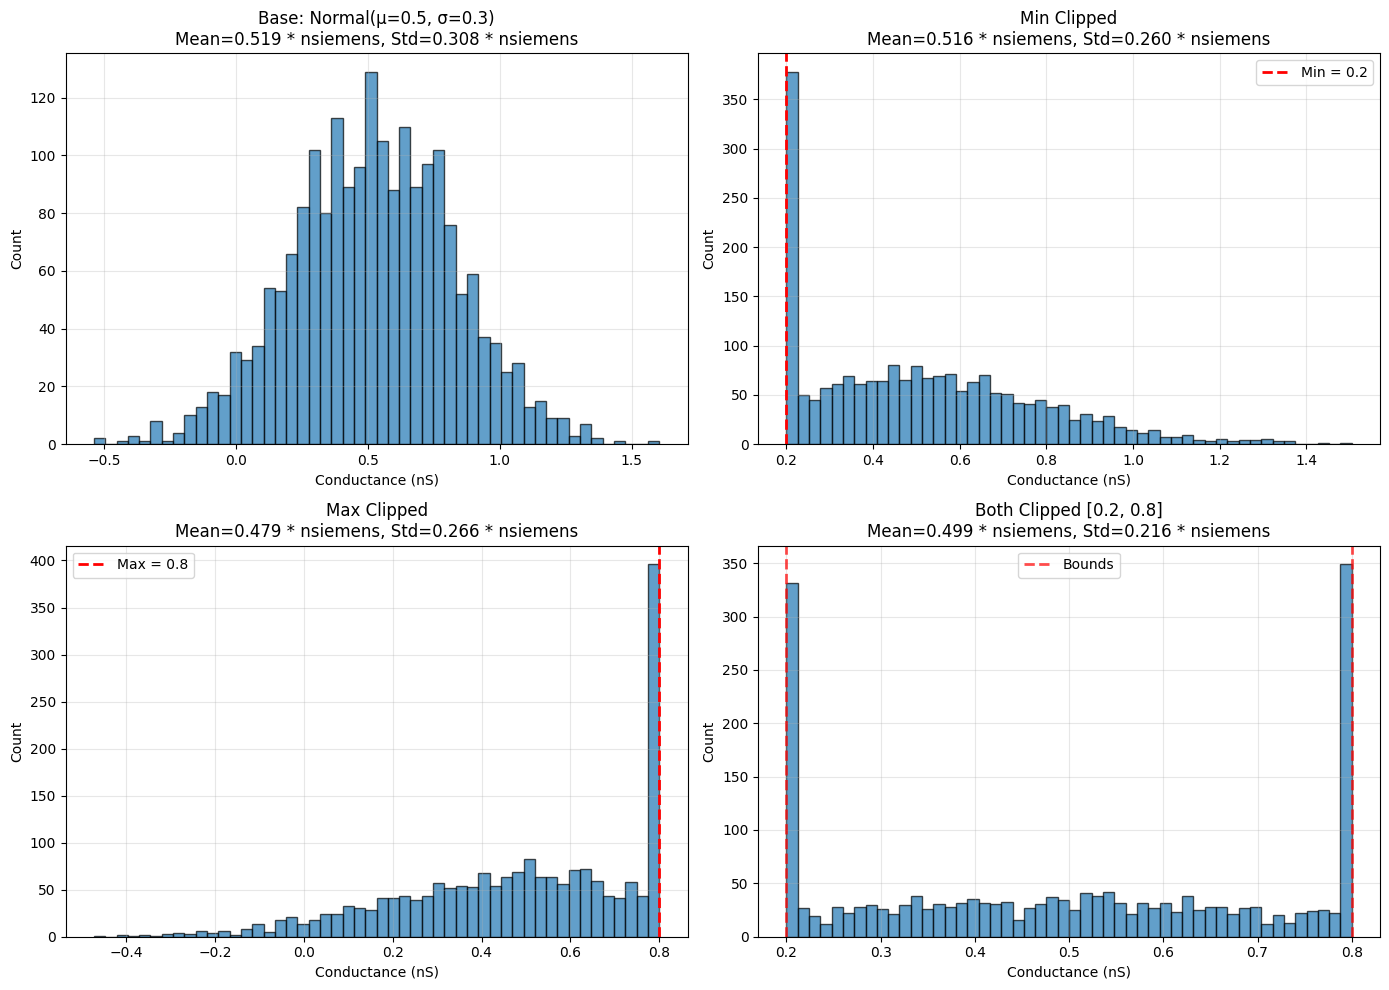


✂️ Clipping effects:
  Base: 298 values < 0.2, 355 values > 0.8
  Both clipped: All values in [0.2, 0.8]
  Clipping reduces variance: 0.308 * nsiemens → 0.216 * nsiemens


In [9]:
# Clipped distribution
base_dist = init.Normal(mean=0.5 * u.nS, std=0.3 * u.nS)

clipped_min = init.Clipped(base_dist, min_val=0.2 * u.nS, max_val=None)
clipped_max = init.Clipped(base_dist, min_val=None, max_val=0.8 * u.nS)
clipped_both = init.Clipped(base_dist, min_val=0.2 * u.nS, max_val=0.8 * u.nS)

# Generate weights
n_samples = 2000
weights_base = base_dist(n_samples, rng=rng)
weights_min = clipped_min(n_samples, rng=rng)
weights_max = clipped_max(n_samples, rng=rng)
weights_both = clipped_both(n_samples, rng=rng)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Base
axes[0].hist(weights_base.mantissa, bins=50, alpha=0.7, edgecolor='black')
axes[0].set_xlabel(f'Conductance ({weights_base.unit})')
axes[0].set_ylabel('Count')
axes[0].set_title(f'Base: Normal(μ=0.5, σ=0.3)\nMean={weights_base.mean():.3f}, Std={weights_base.std():.3f}')
axes[0].grid(alpha=0.3)

# Min clipped
axes[1].hist(weights_min.mantissa, bins=50, alpha=0.7, edgecolor='black')
axes[1].axvline(0.2, color='red', linestyle='--', linewidth=2, label='Min = 0.2')
axes[1].set_xlabel(f'Conductance ({weights_min.unit})')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Min Clipped\nMean={weights_min.mean():.3f}, Std={weights_min.std():.3f}')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Max clipped
axes[2].hist(weights_max.mantissa, bins=50, alpha=0.7, edgecolor='black')
axes[2].axvline(0.8, color='red', linestyle='--', linewidth=2, label='Max = 0.8')
axes[2].set_xlabel(f'Conductance ({weights_max.unit})')
axes[2].set_ylabel('Count')
axes[2].set_title(f'Max Clipped\nMean={weights_max.mean():.3f}, Std={weights_max.std():.3f}')
axes[2].legend()
axes[2].grid(alpha=0.3)

# Both clipped
axes[3].hist(weights_both.mantissa, bins=50, alpha=0.7, edgecolor='black')
axes[3].axvline(0.2, color='red', linestyle='--', linewidth=2, alpha=0.7)
axes[3].axvline(0.8, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Bounds')
axes[3].set_xlabel(f'Conductance ({weights_both.unit})')
axes[3].set_ylabel('Count')
axes[3].set_title(f'Both Clipped [0.2, 0.8]\nMean={weights_both.mean():.3f}, Std={weights_both.std():.3f}')
axes[3].legend()
axes[3].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✂️ Clipping effects:")
print(f"  Base: {np.sum(weights_base.mantissa < 0.2)} values < 0.2, "
      f"{np.sum(weights_base.mantissa > 0.8)} values > 0.8")
print(f"  Both clipped: All values in [0.2, 0.8]")
print(f"  Clipping reduces variance: {weights_base.std():.3f} → {weights_both.std():.3f}")

## 5. Distance-Modulated Initialization

**DistanceModulated** combines a base weight distribution with a distance-dependent profile:

$$W(d) = W_{base} \cdot f(d)$$

where:
- $W_{base}$: Base weight distribution
- $f(d)$: Distance profile
- $d$: Spatial distance between neurons

This creates spatially structured connectivity patterns.

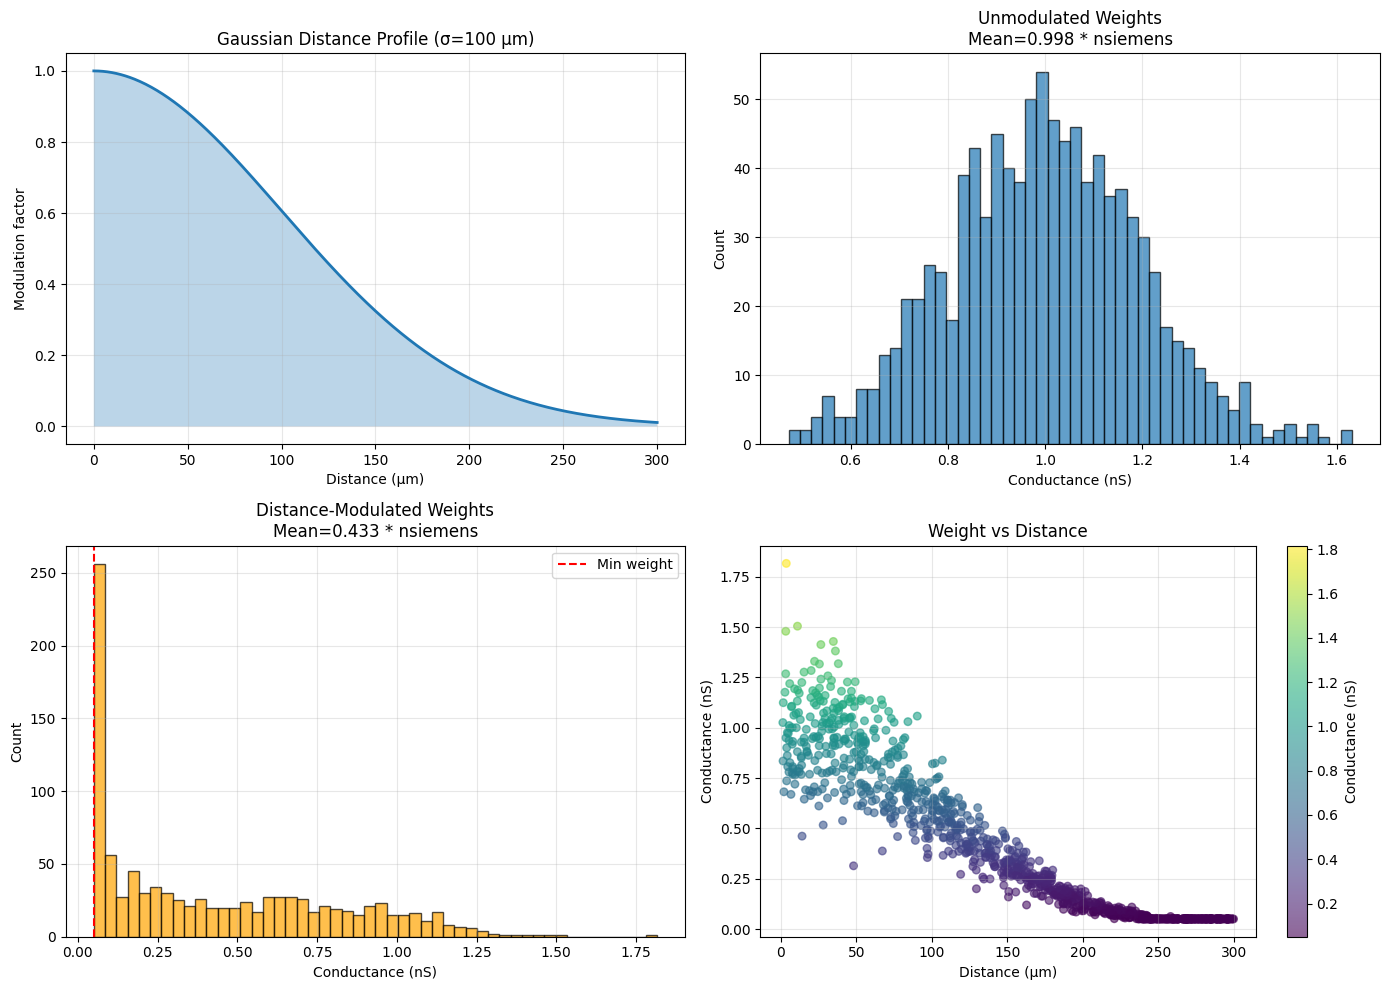


🌍 Distance modulation effects:
  Unmodulated mean: 0.998 * nsiemens
  Modulated mean: 0.433 * nsiemens
  Close connections (< 50 μm) mean: 0.966 * nsiemens
  Far connections (> 200 μm) mean: 0.065 * nsiemens


In [10]:
# Example 1: Gaussian distance modulation
base_weights = init.Normal(mean=1.0 * u.nS, std=0.2 * u.nS)
gaussian_profile = init.GaussianProfile(sigma=100.0 * u.um)

distance_modulated = init.DistanceModulated(
    base_dist=base_weights,
    distance_profile=gaussian_profile,
    min_weight=0.05 * u.nS  # Floor to ensure some connectivity
)

# Create distance array
n_connections = 1000
distances = np.random.uniform(0, 300, n_connections) * u.um

# Generate modulated weights
weights_modulated = distance_modulated(n_connections, distances=distances, rng=rng)
weights_unmodulated = base_weights(n_connections, rng=rng)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distance profile
dist_range = np.linspace(0, 300, 500) * u.um
profile_values = gaussian_profile.probability(dist_range)
axes[0, 0].plot(dist_range.mantissa, profile_values, linewidth=2)
axes[0, 0].fill_between(dist_range.mantissa, profile_values, alpha=0.3)
axes[0, 0].set_xlabel('Distance (μm)')
axes[0, 0].set_ylabel('Modulation factor')
axes[0, 0].set_title('Gaussian Distance Profile (σ=100 μm)')
axes[0, 0].grid(alpha=0.3)

# Unmodulated weights
axes[0, 1].hist(weights_unmodulated.mantissa, bins=50, alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel(f'Conductance ({weights_unmodulated.unit})')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title(f'Unmodulated Weights\nMean={weights_unmodulated.mean():.3f}')
axes[0, 1].grid(alpha=0.3)

# Modulated weights histogram
axes[1, 0].hist(weights_modulated.mantissa, bins=50, alpha=0.7, 
                edgecolor='black', color='orange')
axes[1, 0].axvline(0.05, color='red', linestyle='--', label='Min weight')
axes[1, 0].set_xlabel(f'Conductance ({weights_modulated.unit})')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title(f'Distance-Modulated Weights\nMean={weights_modulated.mean():.3f}')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Scatter: weight vs distance
scatter = axes[1, 1].scatter(distances.mantissa, weights_modulated.mantissa, 
                             c=weights_modulated.mantissa, cmap='viridis', 
                             s=30, alpha=0.6)
axes[1, 1].set_xlabel('Distance (μm)')
axes[1, 1].set_ylabel(f'Conductance ({weights_modulated.unit})')
axes[1, 1].set_title('Weight vs Distance')
plt.colorbar(scatter, ax=axes[1, 1], label='Conductance (nS)')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🌍 Distance modulation effects:")
print(f"  Unmodulated mean: {weights_unmodulated.mean():.3f}")
print(f"  Modulated mean: {weights_modulated.mean():.3f}")
print(f"  Close connections (< 50 μm) mean: {weights_modulated[distances.mantissa < 50].mean():.3f}")
print(f"  Far connections (> 200 μm) mean: {weights_modulated[distances.mantissa > 200].mean():.3f}")

### Different Distance Profiles

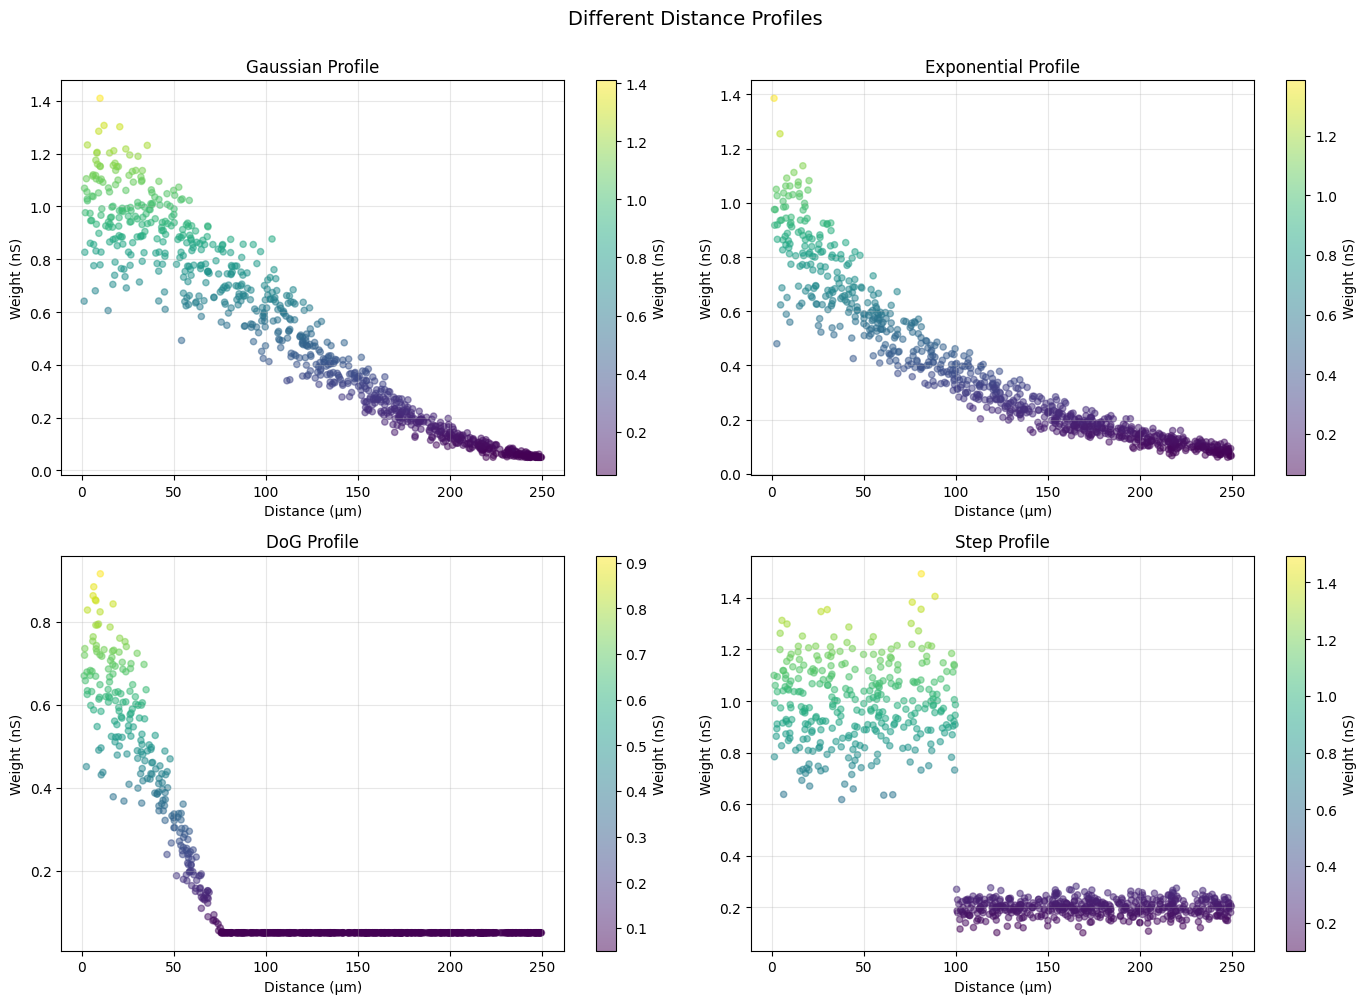


📊 Profile comparison:
  Gaussian: Smooth decay, strongest at center
  Exponential: Monotonic decay with heavier tail
  DoG: Center-surround with lateral inhibition
  Step: Binary connectivity regions


In [11]:
# Compare different distance profiles
base = init.Normal(1.0 * u.nS, 0.15 * u.nS)

profiles = {
    'Gaussian': init.GaussianProfile(sigma=100.0 * u.um),
    'Exponential': init.ExponentialProfile(decay_constant=100.0 * u.um),
    'DoG': init.DoGProfile(sigma_center=50.0 * u.um, sigma_surround=150.0 * u.um,
                           amplitude_center=1.0, amplitude_surround=0.3),
    'Step': init.StepProfile(threshold=100.0 * u.um, inside_prob=1.0, outside_prob=0.2),
}

# Generate distances
n_samples = 800
distances = np.random.uniform(0, 250, n_samples) * u.um

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for ax, (name, profile) in zip(axes, profiles.items()):
    # Create distance-modulated initializer
    dm = init.DistanceModulated(base, profile, min_weight=0.05 * u.nS)
    weights = dm(n_samples, distances=distances, rng=rng)
    
    # Scatter plot
    scatter = ax.scatter(distances.mantissa, weights.mantissa, 
                        c=weights.mantissa, cmap='viridis', s=20, alpha=0.5)
    ax.set_xlabel('Distance (μm)')
    ax.set_ylabel(f'Weight ({weights.unit})')
    ax.set_title(f'{name} Profile')
    ax.grid(alpha=0.3)
    plt.colorbar(scatter, ax=ax, label='Weight (nS)')

plt.suptitle('Different Distance Profiles', fontsize=14, y=1.00)
plt.tight_layout()
plt.show()

print("\n📊 Profile comparison:")
print("  Gaussian: Smooth decay, strongest at center")
print("  Exponential: Monotonic decay with heavier tail")
print("  DoG: Center-surround with lateral inhibition")
print("  Step: Binary connectivity regions")

## 6. Building Complex Initialization Schemes

Now let's combine multiple techniques to create sophisticated initialization patterns.

### Scheme 1: E/I Network with Distance Modulation

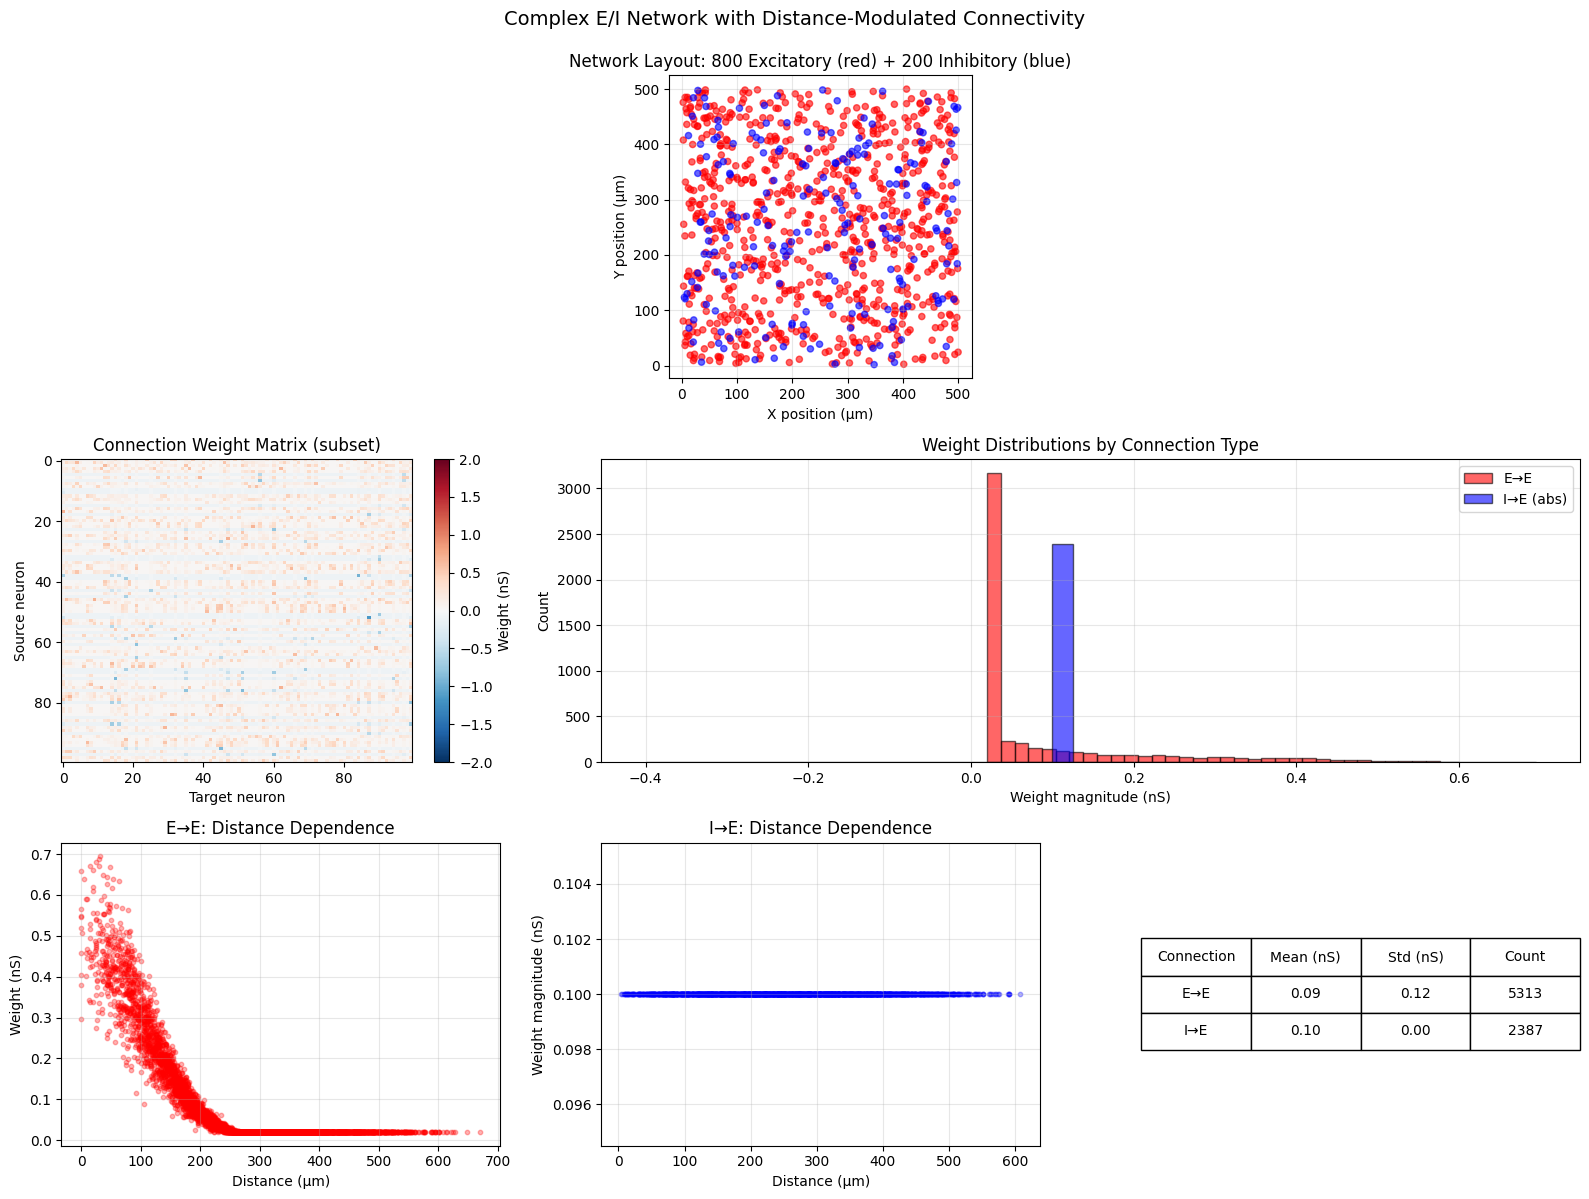


🧠 E/I Network created with:
  ✓ Distance-dependent E→E (Gaussian)
  ✓ Distance-dependent E→I (Exponential)
  ✓ Lateral inhibition I→E (DoG)
  ✓ Local I→I (Gaussian)


In [12]:
# Create E/I network with distance-dependent connectivity
n_exc = 800
n_inh = 200
n_total = n_exc + n_inh

# Generate random 2D positions
np.random.seed(42)
positions = np.random.uniform(0, 500, (n_total, 2))  # μm

# Create connectivity matrix (subset for visualization)
n_show = 100  # Show subset
source_idx = np.random.choice(n_total, n_show, replace=False)
target_idx = np.random.choice(n_total, n_show, replace=False)

# Compute distances
distances = np.linalg.norm(
    positions[source_idx][:, np.newaxis, :] - positions[target_idx][np.newaxis, :, :],
    axis=2
) * u.um

# Initialize E→E connections
exc_profile = init.GaussianProfile(sigma=100.0 * u.um)
exc_base = init.Normal(0.5 * u.nS, 0.1 * u.nS)
exc_init = init.DistanceModulated(exc_base, exc_profile, min_weight=0.02 * u.nS)

# Initialize E→I connections
ei_profile = init.ExponentialProfile(decay_constant=150.0 * u.um)
ei_base = init.Normal(0.6 * u.nS, 0.12 * u.nS)
ei_init = init.DistanceModulated(ei_base, ei_profile, min_weight=0.05 * u.nS)

# Initialize I→E connections (lateral inhibition)
ie_profile = init.DoGProfile(
    sigma_center=60.0 * u.um, sigma_surround=180.0 * u.um,
    amplitude_center=0.5, amplitude_surround=0.6
).clip(min_val=0.0, max_val=1.0)
ie_base = init.LogNormal(1.5 * u.nS, 0.4 * u.nS)
ie_init = init.DistanceModulated(ie_base, ie_profile, min_weight=0.1 * u.nS)

# Initialize I→I connections
ii_profile = init.GaussianProfile(sigma=80.0 * u.um)
ii_base = init.Normal(0.8 * u.nS, 0.15 * u.nS)
ii_init = init.DistanceModulated(ii_base, ii_profile, min_weight=0.05 * u.nS)

# Generate connection weights
weights_matrix = np.zeros((n_show, n_show))

for i, src in enumerate(source_idx):
    for j, tgt in enumerate(target_idx):
        dist = distances[i, j:j+1]
        
        if src < n_exc and tgt < n_exc:  # E→E
            weights_matrix[i, j] = exc_init(1, distances=dist, rng=rng).mantissa[0]
        elif src < n_exc and tgt >= n_exc:  # E→I
            weights_matrix[i, j] = ei_init(1, distances=dist, rng=rng).mantissa[0]
        elif src >= n_exc and tgt < n_exc:  # I→E
            weights_matrix[i, j] = -ie_init(1, distances=dist, rng=rng).mantissa[0]  # Negative for inhibition
        else:  # I→I
            weights_matrix[i, j] = -ii_init(1, distances=dist, rng=rng).mantissa[0]

# Visualize
fig = plt.figure(figsize=(16, 12))
gs = GridSpec(3, 3, figure=fig)

# Network layout
ax1 = fig.add_subplot(gs[0, :])
colors = ['red'] * n_exc + ['blue'] * n_inh
ax1.scatter(positions[:, 0], positions[:, 1], c=colors, s=20, alpha=0.6)
ax1.set_xlabel('X position (μm)')
ax1.set_ylabel('Y position (μm)')
ax1.set_title(f'Network Layout: {n_exc} Excitatory (red) + {n_inh} Inhibitory (blue)')
ax1.set_aspect('equal')
ax1.grid(alpha=0.3)

# Connection matrix
ax2 = fig.add_subplot(gs[1, 0])
im = ax2.imshow(weights_matrix, cmap='RdBu_r', vmin=-2, vmax=2, aspect='auto')
ax2.set_xlabel('Target neuron')
ax2.set_ylabel('Source neuron')
ax2.set_title('Connection Weight Matrix (subset)')
plt.colorbar(im, ax=ax2, label='Weight (nS)')

# Weight distribution by type
ax3 = fig.add_subplot(gs[1, 1:])
exc_weights = weights_matrix[source_idx < n_exc][:, target_idx < n_exc].flatten()
exc_weights = exc_weights[exc_weights != 0]
inh_weights = weights_matrix[source_idx >= n_exc][:, target_idx < n_exc].flatten()
inh_weights = inh_weights[inh_weights != 0]

ax3.hist(exc_weights, bins=40, alpha=0.6, label='E→E', color='red', edgecolor='black')
ax3.hist(np.abs(inh_weights), bins=40, alpha=0.6, label='I→E (abs)', color='blue', edgecolor='black')
ax3.set_xlabel('Weight magnitude (nS)')
ax3.set_ylabel('Count')
ax3.set_title('Weight Distributions by Connection Type')
ax3.legend()
ax3.grid(alpha=0.3)

# Distance dependence
ax4 = fig.add_subplot(gs[2, 0])
exc_dists = distances.mantissa[source_idx < n_exc][:, target_idx < n_exc].flatten()
exc_w = weights_matrix[source_idx < n_exc][:, target_idx < n_exc].flatten()
mask = exc_w != 0
ax4.scatter(exc_dists[mask], exc_w[mask], alpha=0.3, s=10, color='red')
ax4.set_xlabel('Distance (μm)')
ax4.set_ylabel('Weight (nS)')
ax4.set_title('E→E: Distance Dependence')
ax4.grid(alpha=0.3)

# I→E distance dependence
ax5 = fig.add_subplot(gs[2, 1])
inh_dists = distances.mantissa[source_idx >= n_exc][:, target_idx < n_exc].flatten()
inh_w = weights_matrix[source_idx >= n_exc][:, target_idx < n_exc].flatten()
mask = inh_w != 0
ax5.scatter(inh_dists[mask], np.abs(inh_w[mask]), alpha=0.3, s=10, color='blue')
ax5.set_xlabel('Distance (μm)')
ax5.set_ylabel('Weight magnitude (nS)')
ax5.set_title('I→E: Distance Dependence')
ax5.grid(alpha=0.3)

# Statistics table
ax6 = fig.add_subplot(gs[2, 2])
ax6.axis('off')
stats = [
    ['Connection', 'Mean (nS)', 'Std (nS)', 'Count'],
    ['E→E', f'{np.mean(exc_weights):.2f}', f'{np.std(exc_weights):.2f}', f'{len(exc_weights)}'],
    ['I→E', f'{np.mean(np.abs(inh_weights)):.2f}', f'{np.std(np.abs(inh_weights)):.2f}', f'{len(inh_weights)}'],
]
table = ax6.table(cellText=stats, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

plt.suptitle('Complex E/I Network with Distance-Modulated Connectivity', fontsize=14, y=0.995)
plt.tight_layout()
plt.show()

print("\n🧠 E/I Network created with:")
print("  ✓ Distance-dependent E→E (Gaussian)")
print("  ✓ Distance-dependent E→I (Exponential)")
print("  ✓ Lateral inhibition I→E (DoG)")
print("  ✓ Local I→I (Gaussian)")

## 7. Integration Example: Biologically Realistic Cortical Circuit

Let's create a complete cortical microcircuit with:
- Multiple cell types
- Layer-specific connectivity
- Distance-dependent patterns
- Heterogeneous weights

Creating cortical microcircuit...
Microcircuit initialized!


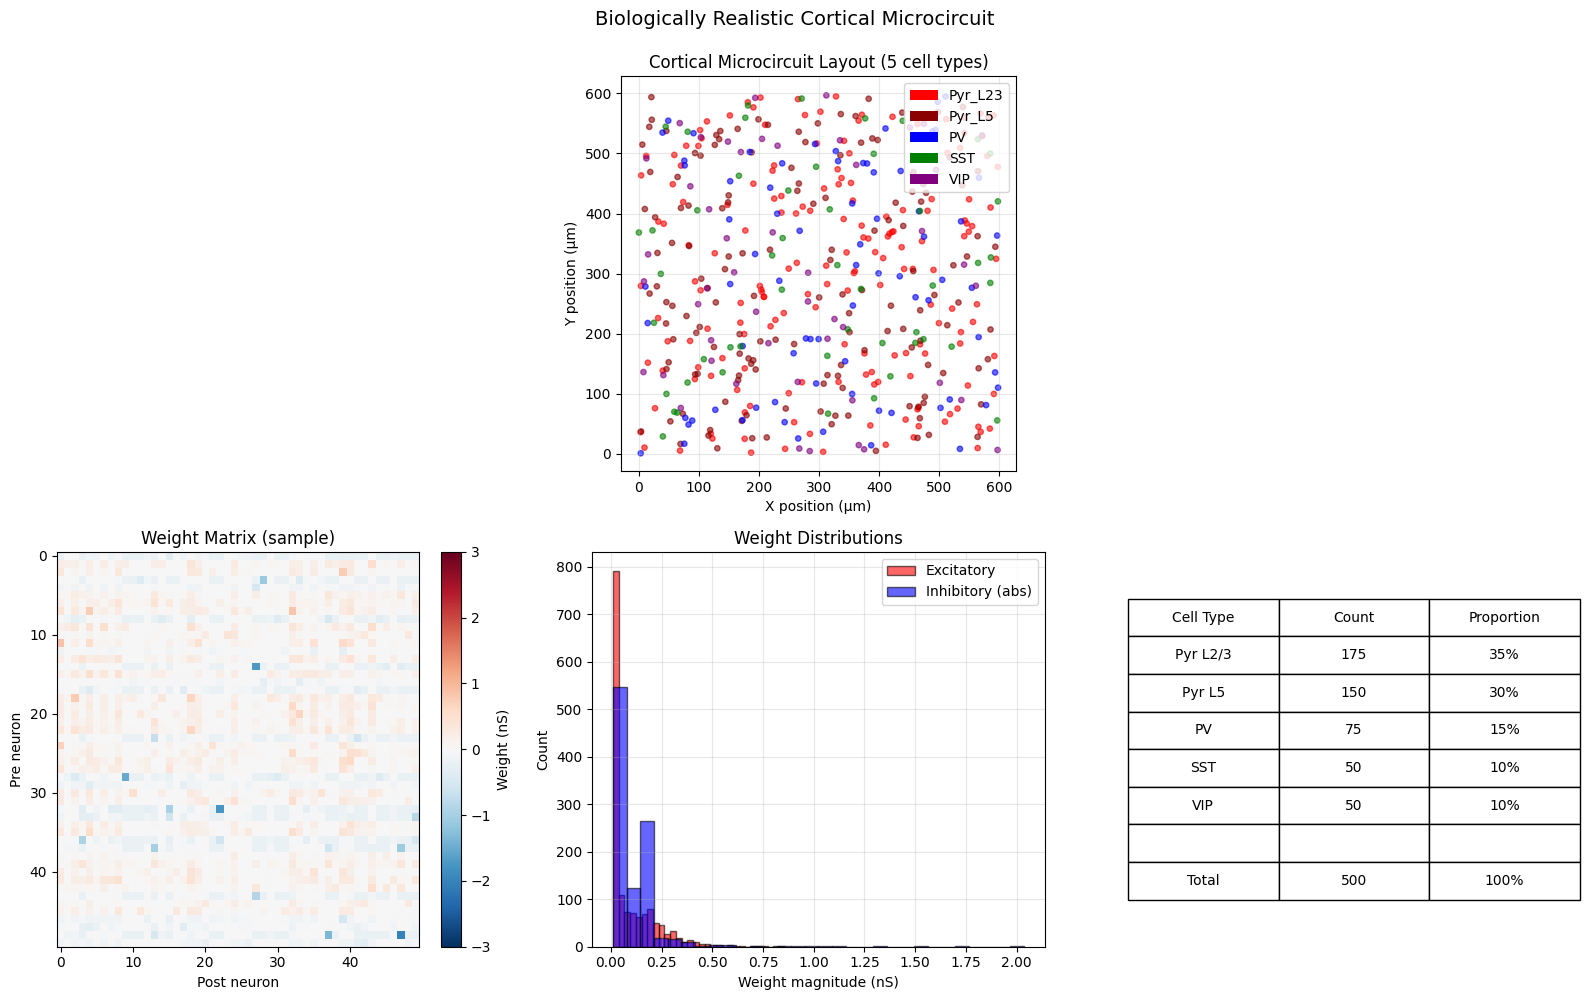


🎯 Microcircuit statistics:
  Total neurons: 500
  Excitatory: 325 (65%)
  Inhibitory: 175 (35%)

  Sampled connections: 50×50 = 2500
  Non-zero weights: 2496
  Excitatory weights: mean=0.10 nS, std=0.12 nS
  Inhibitory weights: mean=0.11 nS, std=0.17 nS


In [13]:
# Define cortical microcircuit
class CorticalMicrocircuit:
    def __init__(self, n_neurons=500, spatial_extent=600.0):
        self.n_neurons = n_neurons
        self.spatial_extent = spatial_extent  # μm
        
        # Cell type proportions (simplified)
        self.n_pyr_l23 = int(0.35 * n_neurons)  # Pyramidal L2/3
        self.n_pyr_l5 = int(0.30 * n_neurons)   # Pyramidal L5
        self.n_pv = int(0.15 * n_neurons)       # Parvalbumin interneurons
        self.n_sst = int(0.10 * n_neurons)      # Somatostatin interneurons
        self.n_vip = int(0.10 * n_neurons)      # VIP interneurons
        
        # Generate positions
        self.positions = np.random.uniform(0, spatial_extent, (n_neurons, 2))
        
        # Cell type labels
        self.cell_types = (
            ['Pyr_L23'] * self.n_pyr_l23 +
            ['Pyr_L5'] * self.n_pyr_l5 +
            ['PV'] * self.n_pv +
            ['SST'] * self.n_sst +
            ['VIP'] * self.n_vip
        )
        
    def get_connection_params(self, pre_type, post_type):
        """Get initialization parameters for specific connection type."""
        
        params = {
            # Excitatory connections
            ('Pyr_L23', 'Pyr_L23'): {
                'base': init.Normal(0.4 * u.nS, 0.08 * u.nS),
                'profile': init.GaussianProfile(sigma=120.0 * u.um),
                'min_weight': 0.02 * u.nS
            },
            ('Pyr_L23', 'Pyr_L5'): {
                'base': init.Normal(0.6 * u.nS, 0.12 * u.nS),
                'profile': init.ExponentialProfile(decay_constant=150.0 * u.um),
                'min_weight': 0.03 * u.nS
            },
            ('Pyr_L5', 'Pyr_L5'): {
                'base': init.LogNormal(0.8 * u.nS, 0.3 * u.nS),
                'profile': init.BimodalProfile(
                    sigma1=80.0 * u.um, sigma2=200.0 * u.um,
                    center1=0.0 * u.um, center2=300.0 * u.um,
                    amplitude1=0.8, amplitude2=0.3
                ),
                'min_weight': 0.05 * u.nS
            },
            
            # Inhibitory connections
            ('PV', 'Pyr_L23'): {
                'base': init.Normal(2.0 * u.nS, 0.4 * u.nS),
                'profile': init.GaussianProfile(sigma=60.0 * u.um),
                'min_weight': 0.2 * u.nS
            },
            ('SST', 'Pyr_L5'): {
                'base': init.Normal(1.5 * u.nS, 0.3 * u.nS),
                'profile': init.DoGProfile(
                    sigma_center=50.0 * u.um, sigma_surround=150.0 * u.um,
                    amplitude_center=0.8, amplitude_surround=0.4
                ),
                'min_weight': 0.1 * u.nS
            },
        }
        
        # Default for undefined connections
        default = {
            'base': init.Normal(0.3 * u.nS, 0.1 * u.nS),
            'profile': init.GaussianProfile(sigma=100.0 * u.um),
            'min_weight': 0.01 * u.nS
        }
        
        return params.get((pre_type, post_type), default)
    
    def initialize_connection(self, pre_idx, post_idx, rng):
        """Initialize a single connection."""
        pre_type = self.cell_types[pre_idx]
        post_type = self.cell_types[post_idx]
        
        # Compute distance
        dist = np.linalg.norm(self.positions[pre_idx] - self.positions[post_idx])
        distance = np.array([dist]) * u.um
        
        # Get parameters
        params = self.get_connection_params(pre_type, post_type)
        
        # Create distance-modulated initializer
        dm_init = init.DistanceModulated(
            base_dist=params['base'],
            distance_profile=params['profile'],
            min_weight=params['min_weight']
        )
        
        # Generate weight
        weight = dm_init(1, distances=distance, rng=rng).mantissa[0]
        
        # Make inhibitory connections negative
        if pre_type in ['PV', 'SST', 'VIP']:
            weight = -weight
        
        return weight

# Create microcircuit
print("Creating cortical microcircuit...")
circuit = CorticalMicrocircuit(n_neurons=500)

# Sample connections for visualization
n_sample = 50
pre_sample = np.random.choice(circuit.n_neurons, n_sample, replace=False)
post_sample = np.random.choice(circuit.n_neurons, n_sample, replace=False)

# Initialize sampled connections
rng = np.random.default_rng(42)
weights_sample = np.zeros((n_sample, n_sample))

for i, pre in enumerate(pre_sample):
    for j, post in enumerate(post_sample):
        if pre != post:  # No self-connections
            weights_sample[i, j] = circuit.initialize_connection(pre, post, rng)

print("Microcircuit initialized!")

# Visualize
fig = plt.figure(figsize=(16, 10))
gs = GridSpec(2, 3, figure=fig)

# Network layout with cell types
ax1 = fig.add_subplot(gs[0, :])
type_colors = {
    'Pyr_L23': 'red', 'Pyr_L5': 'darkred',
    'PV': 'blue', 'SST': 'green', 'VIP': 'purple'
}
colors = [type_colors[ct] for ct in circuit.cell_types]
ax1.scatter(circuit.positions[:, 0], circuit.positions[:, 1], 
           c=colors, s=15, alpha=0.6)

# Legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=cell_type) 
                  for cell_type, color in type_colors.items()]
ax1.legend(handles=legend_elements, loc='upper right')
ax1.set_xlabel('X position (μm)')
ax1.set_ylabel('Y position (μm)')
ax1.set_title('Cortical Microcircuit Layout (5 cell types)')
ax1.set_aspect('equal')
ax1.grid(alpha=0.3)

# Connection matrix
ax2 = fig.add_subplot(gs[1, 0])
im = ax2.imshow(weights_sample, cmap='RdBu_r', vmin=-3, vmax=3, aspect='auto')
ax2.set_xlabel('Post neuron')
ax2.set_ylabel('Pre neuron')
ax2.set_title('Weight Matrix (sample)')
plt.colorbar(im, ax=ax2, label='Weight (nS)')

# Weight distribution
ax3 = fig.add_subplot(gs[1, 1])
exc_weights = weights_sample[weights_sample > 0]
inh_weights = weights_sample[weights_sample < 0]
ax3.hist(exc_weights, bins=30, alpha=0.6, label='Excitatory', color='red', edgecolor='black')
ax3.hist(np.abs(inh_weights), bins=30, alpha=0.6, label='Inhibitory (abs)', 
        color='blue', edgecolor='black')
ax3.set_xlabel('Weight magnitude (nS)')
ax3.set_ylabel('Count')
ax3.set_title('Weight Distributions')
ax3.legend()
ax3.grid(alpha=0.3)

# Statistics
ax4 = fig.add_subplot(gs[1, 2])
ax4.axis('off')
stats = [
    ['Cell Type', 'Count', 'Proportion'],
    ['Pyr L2/3', str(circuit.n_pyr_l23), '35%'],
    ['Pyr L5', str(circuit.n_pyr_l5), '30%'],
    ['PV', str(circuit.n_pv), '15%'],
    ['SST', str(circuit.n_sst), '10%'],
    ['VIP', str(circuit.n_vip), '10%'],
    ['', '', ''],
    ['Total', str(circuit.n_neurons), '100%'],
]
table = ax4.table(cellText=stats, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

plt.suptitle('Biologically Realistic Cortical Microcircuit', fontsize=14, y=0.995)
plt.tight_layout()
plt.show()

print(f"\n🎯 Microcircuit statistics:")
print(f"  Total neurons: {circuit.n_neurons}")
print(f"  Excitatory: {circuit.n_pyr_l23 + circuit.n_pyr_l5} ({100*(circuit.n_pyr_l23 + circuit.n_pyr_l5)/circuit.n_neurons:.0f}%)")
print(f"  Inhibitory: {circuit.n_pv + circuit.n_sst + circuit.n_vip} ({100*(circuit.n_pv + circuit.n_sst + circuit.n_vip)/circuit.n_neurons:.0f}%)")
print(f"\n  Sampled connections: {n_sample}×{n_sample} = {n_sample**2}")
print(f"  Non-zero weights: {np.sum(weights_sample != 0)}")
print(f"  Excitatory weights: mean={np.mean(exc_weights):.2f} nS, std={np.std(exc_weights):.2f} nS")
print(f"  Inhibitory weights: mean={np.mean(np.abs(inh_weights)):.2f} nS, std={np.std(np.abs(inh_weights)):.2f} nS")

## Summary

In this tutorial, we covered:

1. **Mixture distributions**: Creating heterogeneous populations
2. **Conditional initialization**: Cell type-specific properties
3. **Scaled/Clipped distributions**: Transforming base distributions
4. **DistanceModulated**: Spatially structured connectivity
5. **Complex schemes**: Combining multiple strategies
6. **Biological realism**: Complete cortical microcircuit

Design Patterns:

| Pattern | Use Case | Example |
|---------|----------|------|
| **Mixture** | Multiple synapse types | Weak + strong synapses |
| **Conditional** | Cell type differences | E vs I neurons |
| **Scaled** | Global modulation | Activity-dependent scaling |
| **Clipped** | Biological bounds | Ensure positive conductances |
| **DistanceModulated** | Spatial structure | Local vs long-range |
| **Combined** | Realistic circuits | All of the above |